In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
pd.set_option('display.max_rows', 100)

In [3]:
train = pd.read_csv('xxx_train.csv')
test = pd.read_csv('xxx_test.csv')

In [470]:
train['X_0_2'].value_counts()

-1.00    2548
 1.00     636
 0.00     629
 3.00     624
 2.00     622
 2.76      30
 1.48      28
 2.40      27
 1.21      26
 0.35      26
 2.12      25
 2.70      25
 0.19      25
 2.93      24
 0.30      24
 0.78      24
 1.74      24
 2.67      24
 1.12      23
 1.80      23
 1.51      23
 1.04      23
 0.83      23
 2.81      23
 2.44      23
 0.82      23
 0.48      22
 0.55      22
 2.58      22
 0.80      22
 0.95      22
 0.29      22
 2.80      22
 0.36      22
 0.42      22
 2.57      22
 1.73      22
 0.63      22
 2.30      22
 2.74      22
 2.85      22
 1.28      22
 2.55      21
 2.71      21
 0.81      21
 0.38      21
 1.09      21
 2.69      21
 0.16      21
 2.88      21
 2.63      21
 2.01      21
 2.72      21
 1.39      21
 1.87      20
 1.45      20
 1.36      20
 1.30      20
 0.64      20
 1.77      20
 1.61      20
 0.86      20
 2.09      20
 1.11      20
 1.85      20
 1.57      20
 2.24      20
 0.68      20
 0.69      20
 2.84      20
 2.03      20
 2.50 

In [4]:
y = train.pop('y')

AttributeError: 'Series' object has no attribute 'sort'

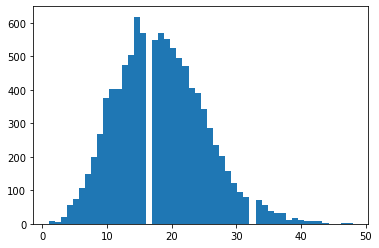

In [470]:
plt.hist(y, bins=50)
y.value_counts().sort()

In [52]:
np.sort(y.unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 47., 48.])

In [5]:
y.value_counts()

15.0    618
16.0    568
18.0    568
19.0    552
17.0    549
20.0    526
14.0    503
21.0    494
13.0    475
22.0    470
23.0    405
12.0    402
11.0    402
24.0    391
10.0    375
25.0    342
26.0    285
9.0     268
27.0    234
28.0    201
8.0     199
29.0    159
7.0     150
30.0    123
6.0     108
31.0     94
32.0     81
5.0      74
33.0     70
34.0     56
4.0      55
35.0     38
36.0     32
37.0     31
3.0      21
39.0     16
38.0     11
40.0     11
43.0      9
42.0      8
41.0      7
1.0       7
2.0       6
44.0      3
48.0      2
47.0      1
Name: y, dtype: int64

In [57]:
# l = list(train.columns)
# for i in range(0, len(l), 3):
    

In [85]:
df = pd.DataFrame({'a' : [1, 2, 3, 5, 5], 'b' : ['a', 'b', 'c', 'd', 'e'], 'c' : [0, 1, 1, 0, 0]}) 

In [65]:
df

,a,b,c
0,1,a,0.0
1,2,b,0.0
2,3,c,NaN
3,5,d,0.0
4,5,e,0.0


In [68]:
df.iloc[0:2, [0, 2]]

,a,c
0,1,0.0
1,2,0.0


In [69]:
df.loc[0:1, ['a', 'c']]

,a,c
0,1,0.0
1,2,0.0


In [164]:
td = df[df.a==5]['b'].values
td

array(['d', 'e'], dtype=object)

# ------

In [2]:
train

NameError: name 'train' is not defined

In [11]:
train.isna().sum().value_counts()

0    300
dtype: int64

In [14]:
X_train = train.values

In [22]:
X_train_scaled = (train - train.mean()) / train.std()

In [27]:
X_test_scaled = (test - test.mean()) / test.std()

In [350]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn import linear_model

In [50]:
cv = KFold(n_splits=5, shuffle=True)
#grid_search
cur = cross_val_score(BayesianRidge(), X_train_scaled, y, cv=cv, scoring='neg_mean_absolute_error')

In [51]:
-cur.mean()

4.116155233980278

In [54]:
a = pd.DataFrame({'a' : [1, 2, 3], 'b' : [3.2, 4.2, 4.1]})
a

,a,b
0,1,3.2
1,2,4.2
2,3,4.1


In [56]:
pd.get_dummies(a['a'], prefix='a')

,a_1,a_2,a_3
0,1,0,0
1,0,1,0
2,0,0,1


In [57]:
X_new_train = pd.DataFrame(train['X_0_0'])
for i in range(0, train.shape[1], 3):
    X_new_train = X_new_train.join(pd.get_dummies(train.iloc[:, i], prefix=train.columns[i]))
    X_new_train = X_new_train.join(train.iloc[:, i + 1])
    X_new_train = X_new_train.join(train.iloc[:, i + 2])
X_new_train.pop('X_0_0')

0       3.0
1       0.0
2       1.0
3       0.0
4       3.0
       ... 
9995    3.0
9996    2.0
9997    0.0
9998    0.0
9999    0.0
Name: X_0_0, Length: 10000, dtype: float64

In [147]:
X_new_train

,X_0_0_0.0,X_0_0_1.0,X_0_0_2.0,X_0_0_3.0,X_0_1,X_0_2,X_1_0_0.0,X_1_0_1.0,X_1_0_2.0,X_1_0_3.0,...,X_98_0_2.0,X_98_0_3.0,X_98_1,X_98_2,X_99_0_0.0,X_99_0_1.0,X_99_0_2.0,X_99_0_3.0,X_99_1,X_99_2
0,0,0,0,1,48.0,1.04,0,0,0,1,...,0,0,31.0,2.00,0,0,1,0,-1.0,0.01
1,1,0,0,0,5.0,-1.00,1,0,0,0,...,0,0,1.0,1.00,0,0,1,0,-1.0,1.36
2,0,1,0,0,49.0,3.00,0,0,0,1,...,0,1,44.0,3.00,0,0,1,0,-1.0,0.99
3,1,0,0,0,3.0,-1.00,0,0,0,1,...,0,1,37.0,2.10,0,0,1,0,-1.0,2.04
4,0,0,0,1,0.0,1.70,1,0,0,0,...,0,1,58.0,0.79,0,0,1,0,-1.0,1.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,1,76.0,2.55,0,1,0,0,...,0,0,6.0,-1.00,0,0,0,1,40.0,0.67
9996,0,0,1,0,-1.0,2.93,0,0,0,1,...,1,0,-1.0,2.14,0,0,1,0,-1.0,1.62
9997,1,0,0,0,4.0,-1.00,0,0,0,1,...,0,1,47.0,2.80,0,0,1,0,-1.0,1.61
9998,1,0,0,0,3.0,-1.00,0,0,1,0,...,1,0,-1.0,2.83,0,0,0,1,23.0,1.42


In [62]:
cv = KFold(n_splits=5, shuffle=True)
cur = cross_val_score(BayesianRidge(), (X_new_train - X_new_train.mean()) / X_new_train.std(), y, cv=cv, scoring='neg_mean_absolute_error')
-cur.mean()

3.5485047704308768

In [495]:
#train
b = np.arange(1, 101)
b

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [201]:
X_0 = train.iloc[:, 0::3]
X_1 = train.iloc[:, 1::3]
X_2 = train.iloc[:, 2::3]

res_0 = np.zeros((0,1))
res_1 = np.zeros((0,1))
res_2 = np.zeros((0,1))
for i in range(100):
    res_0 = np.vstack((res_0, X_0.iloc[:, i].values.reshape(len(X_0.iloc[:, i]), 1)))
    res_1 = np.vstack((res_1, X_1.iloc[:, i].values.reshape(len(X_1.iloc[:, i]), 1)))
    res_2 = np.vstack((res_2, X_2.iloc[:, i].values.reshape(len(X_2.iloc[:, i]), 1)))

X_0 = pd.DataFrame({'1' : res_0.T[0]})
X_1 = pd.DataFrame({'2' : res_1.T[0]})
X_2 = pd.DataFrame({'3' : res_2.T[0]})
new_df = pd.DataFrame({'first' : res_0.T[0], 'second' : res_1.T[0], 'third' : res_2.T[0]})
new_df
_new_df = pd.DataFrame(new_df['first'])
_new_df = _new_df.join(pd.get_dummies(new_df.iloc[:, 0], prefix=new_df.columns[0]))
_new_df = _new_df.join(new_df.iloc[:, 1])
_new_df = _new_df.join(new_df.iloc[:, 2])
_new_df.pop('first')
_new_df

,first_0.0,first_1.0,first_2.0,first_3.0,second,third
0,0,0,0,1,48.0,1.04
1,1,0,0,0,5.0,-1.00
2,0,1,0,0,49.0,3.00
3,1,0,0,0,3.0,-1.00
4,0,0,0,1,0.0,1.70
...,...,...,...,...,...,...
999995,0,0,0,1,40.0,0.67
999996,0,0,1,0,-1.0,1.62
999997,0,0,1,0,-1.0,1.61
999998,0,0,0,1,23.0,1.42


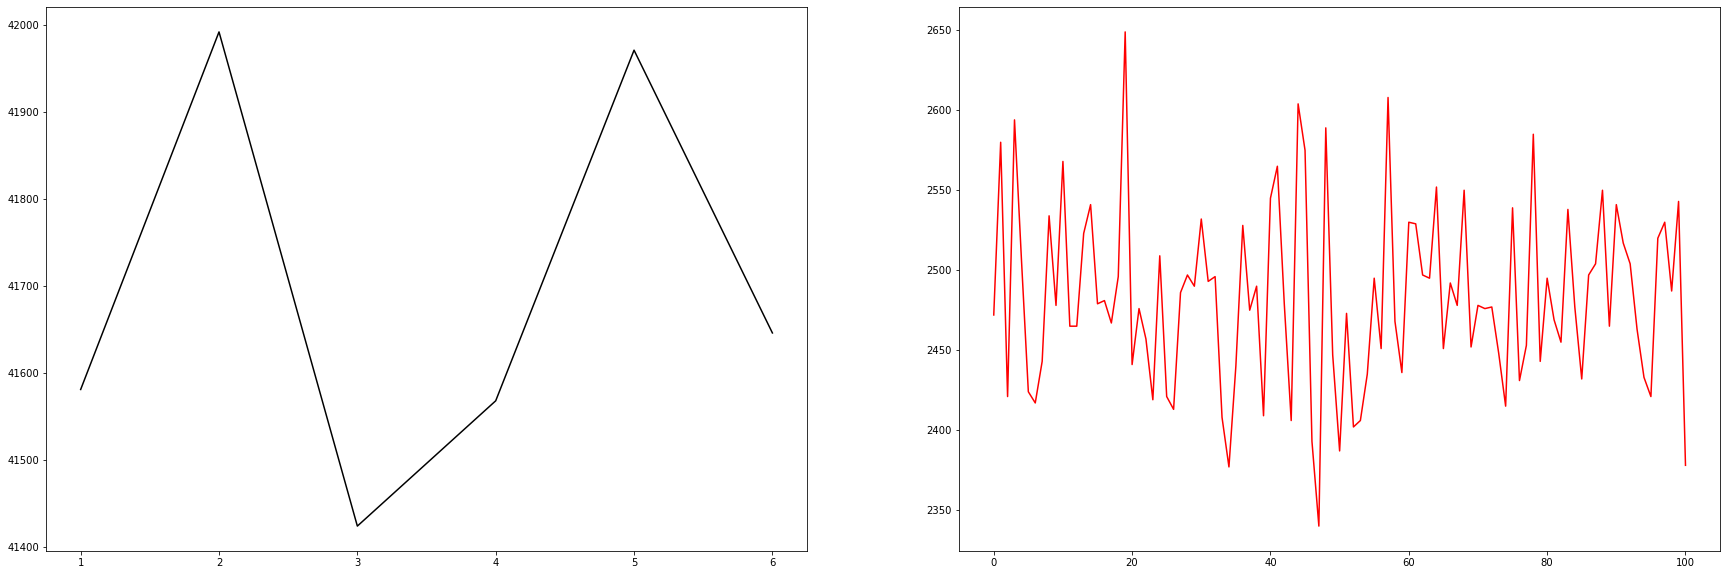

In [277]:
first_0 = new_df.loc[new_df['first'] == 0.0]['second'].values
first_1 = new_df.loc[new_df['first'] == 1.0]['second'].values
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
first_0_second = np.unique(first_0, return_counts=True)
first_1_second = np.unique(first_1, return_counts=True)
ax1.plot(first_0_second[0], first_0_second[1], 'k')
ax2.plot(first_1_second[0], first_1_second[1], 'r')

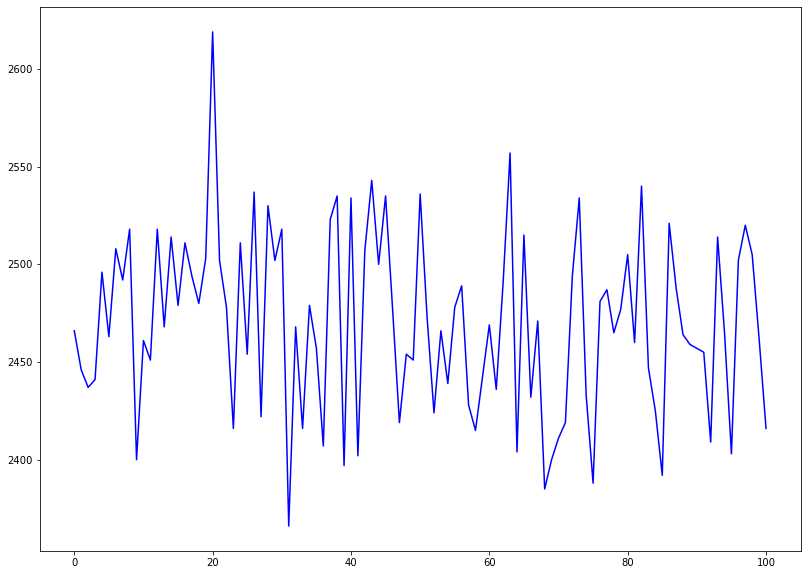

In [276]:
first_2 = new_df.loc[new_df['first'] == 2.0]['second'].values
first_3 = new_df.loc[new_df['first'] == 3.0]['second'].values
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(121)
first_2_second = np.unique(first_2, return_counts=True)
first_3_second = np.unique(first_3, return_counts=True)
first_2_second[0]
#операция 2 содержит только -1
ax.plot(first_3_second[0], first_3_second[1], 'b')

array([0., 1., 2., 3.])

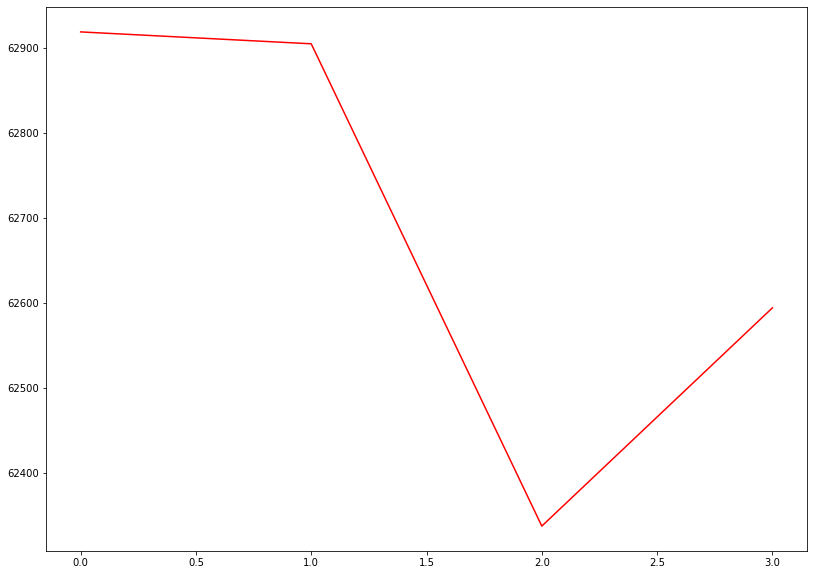

In [289]:
first_0_0 = new_df.loc[new_df['first'] == 0.0]['third'].values
first_1_1 = new_df.loc[new_df['first'] == 1.0]['third'].values
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(121)
first_0_third = np.unique(first_0_0, return_counts=True)
#операция 0 содержит только -1
first_1_third = np.unique(first_1_1, return_counts=True)
#ax1.plot(first_0_third[0], first_0_third[1], 'k')
ax.plot(first_1_third[0], first_1_third[1], 'r')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

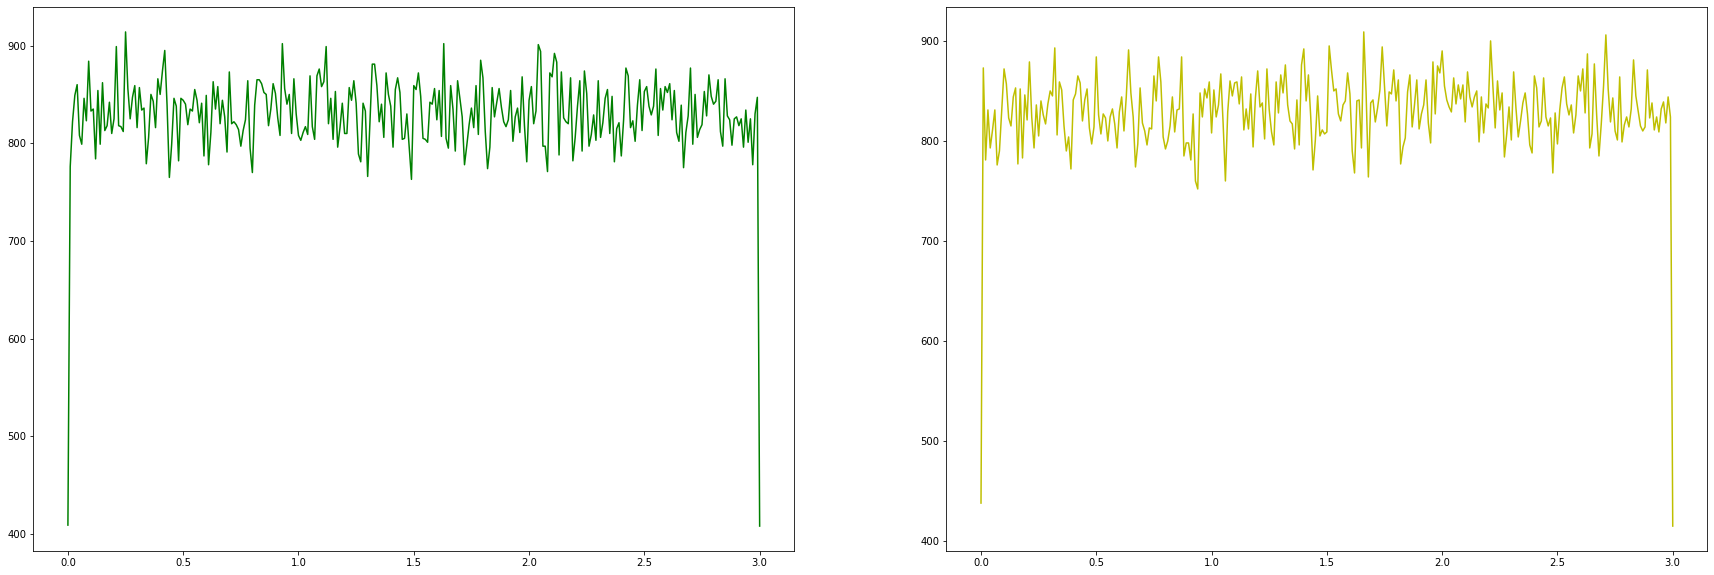

In [288]:
first_2_2 = new_df.loc[new_df['first'] == 2.0]['third'].values
first_3_3 = new_df.loc[new_df['first'] == 3.0]['third'].values
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
first_2_third = np.unique(first_2_2, return_counts=True)
first_3_third = np.unique(first_3_3, return_counts=True)
ax1.plot(first_2_third[0], first_2_third[1], 'g')
ax2.plot(first_3_third[0], first_3_third[1], 'y')
#first_2_third[0] == first_3_third[0]
first_2_third[1] == first_3_third[1]

In [306]:
train

,X_0_0,X_0_1,X_0_2,X_1_0,X_1_1,X_1_2,X_2_0,X_2_1,X_2_2,X_3_0,...,X_96_2,X_97_0,X_97_1,X_97_2,X_98_0,X_98_1,X_98_2,X_99_0,X_99_1,X_99_2
0,3.0,48.0,1.04,3.0,78.0,1.14,1.0,48.0,0.00,0.0,...,2.84,3.0,87.0,2.42,1.0,31.0,2.00,2.0,-1.0,0.01
1,0.0,5.0,-1.00,0.0,4.0,-1.00,1.0,0.0,1.00,1.0,...,3.00,2.0,-1.0,2.40,1.0,1.0,1.00,2.0,-1.0,1.36
2,1.0,49.0,3.00,3.0,90.0,0.61,0.0,6.0,-1.00,2.0,...,1.44,1.0,18.0,3.00,3.0,44.0,3.00,2.0,-1.0,0.99
3,0.0,3.0,-1.00,3.0,28.0,2.00,1.0,79.0,2.00,1.0,...,0.43,3.0,81.0,2.76,3.0,37.0,2.10,2.0,-1.0,2.04
4,3.0,0.0,1.70,0.0,5.0,-1.00,2.0,-1.0,0.72,1.0,...,2.00,2.0,-1.0,2.10,3.0,58.0,0.79,2.0,-1.0,1.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,76.0,2.55,1.0,65.0,3.00,1.0,17.0,3.00,1.0,...,0.93,1.0,10.0,0.00,0.0,6.0,-1.00,3.0,40.0,0.67
9996,2.0,-1.0,2.93,3.0,29.0,1.24,3.0,97.0,1.24,3.0,...,1.39,2.0,-1.0,1.19,2.0,-1.0,2.14,2.0,-1.0,1.62
9997,0.0,4.0,-1.00,3.0,82.0,0.74,0.0,1.0,-1.00,0.0,...,1.45,2.0,-1.0,0.92,3.0,47.0,2.80,2.0,-1.0,1.61
9998,0.0,3.0,-1.00,2.0,-1.0,0.36,3.0,54.0,0.75,1.0,...,-1.00,0.0,2.0,-1.00,2.0,-1.0,2.83,3.0,23.0,1.42


# Суммарная продолжительность движения ленты

In [284]:
# sum_shift = np.zeros(10000)
# for i in range(100):
#     for j in range(10000):
#         if (train.iloc[j, 3*i]==0.0):
#             sum_shift[j] += train.iloc[j,(3*i + 1)]
# sum_shift = pd.DataFrame({'sum_duration' : sum_shift.T})
# sum_shift

cur = np.zeros((10000, 1))
for i in range(0, 300, 3):
    tmp = train.iloc[:, i + 1][train.iloc[:, i] == 0]
    cur[train.iloc[:, i] == 0] += np.array(tmp).reshape((len(tmp), 1))
sum_shift = pd.DataFrame({'sum_duration' : cur.T[0]})
sum_shift

,sum_duration
0,99.0
1,79.0
2,78.0
3,76.0
4,64.0
...,...
9995,86.0
9996,118.0
9997,90.0
9998,90.0


# Сумма типов руд на каждом участке ленты

In [410]:
ore_type = np.zeros((10000, 101))
for i in range(100):
    for j in range(10000):
        if (train.iloc[j, 3*i]==0.0):
            tmp = ore_type[j]
            tmp = np.roll(tmp, int(train.iloc[j, 3*i + 1]))
            ore_type[j] = tmp
            ore_type[j, :int(train.iloc[j, 3*i + 1])] = 0
        if (train.iloc[j, 3*i]==1.0): 
            #if (train.iloc[j, (3*i + 2)] == 0):
                #ore_type[j][int(train.iloc[j, (3*i + 1)])] -= 0.2
            ore_type[j][int(train.iloc[j, (3*i + 1)])] += int(train.iloc[j, (3*i + 2)])
b = np.arange(0, 101)
c = np.arange(0, 10000)
ore_type = pd.DataFrame(data=ore_type, index=c, columns=b)


In [448]:
ore = pd.DataFrame(ore_type.T.sum())
ore
NEW_train = ore.join(ore_type, rsuffix='_type')
NEW_train


,0,0_type,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,19.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
4,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,0.0,3.0,3.0,0.0
9996,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [412]:
ore_type_0 = np.zeros((10000, 101))
ore_type_1 = np.zeros((10000, 101))
ore_type_2 = np.zeros((10000, 101))
ore_type_3 = np.zeros((10000, 101))
for i in range(100):
    for j in range(10000):
        if (train.iloc[j, 3*i]==0.0):
            tmp = ore_type_0[j]
            tmp = np.roll(tmp, int(train.iloc[j, 3*i + 1]))
            ore_type_0[j] = tmp
            ore_type_0[j, :int(train.iloc[j, 3*i + 1])] = 0
            
            tmp = ore_type_1[j]
            tmp = np.roll(tmp, int(train.iloc[j, 3*i + 1]))
            ore_type_1[j] = tmp
            ore_type_1[j, :int(train.iloc[j, 3*i + 1])] = 0
            
            tmp = ore_type_2[j]
            tmp = np.roll(tmp, int(train.iloc[j, 3*i + 1]))
            ore_type_2[j] = tmp
            ore_type_2[j, :int(train.iloc[j, 3*i + 1])] = 0
            
            tmp = ore_type_3[j]
            tmp = np.roll(tmp, int(train.iloc[j, 3*i + 1]))
            ore_type_3[j] = tmp
            ore_type_3[j, :int(train.iloc[j, 3*i + 1])] = 0
        if (train.iloc[j, 3*i]==1.0):
            if(train.iloc[j, (3*i + 2)] == 0) :
                ore_type_0[j][int(train.iloc[j, (3*i + 1)])] += 1
            if(train.iloc[j, (3*i + 2)] == 1) :
                ore_type_1[j][int(train.iloc[j, (3*i + 1)])] += 1
            if(train.iloc[j, (3*i + 2)] == 2) :
                ore_type_2[j][int(train.iloc[j, (3*i + 1)])] += 1
            if(train.iloc[j, (3*i + 2)] == 3) :
                ore_type_3[j][int(train.iloc[j, (3*i + 1)])] += 1
            
b = np.arange(0, 101)
c = np.arange(0, 10000)
ore_type_0 = pd.DataFrame(data=ore_type_0, index=c, columns=b)
ore_type_1 = pd.DataFrame(data=ore_type_1, index=c, columns=b)
ore_type_2 = pd.DataFrame(data=ore_type_2, index=c, columns=b)
ore_type_3 = pd.DataFrame(data=ore_type_3, index=c, columns=b)

In [413]:
ore_join_all = ore_type_0.join(ore_type_1, lsuffix='_0', rsuffix='_1')
ore_join_all = ore_join_all.join(ore_type_2, rsuffix='_2')
ore_join_all = ore_join_all.join(ore_type_3, rsuffix='_3')
ore_join_all

,0_0,1_0,2_0,3_0,4_0,5_0,6_0,7_0,8_0,9_0,...,91_3,92_3,93_3,94_3,95_3,96_3,97_3,98_3,99_3,100_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [414]:
sum_ore_type0 = ore_type_0.T.sum()
sum_ore_type1 = ore_type_1.T.sum()
sum_ore_type2 = ore_type_2.T.sum()
sum_ore_type3 = ore_type_3.T.sum()
sum_ore_type0 = pd.DataFrame(data=sum_ore_type0, index=c)
sum_ore_type1 = pd.DataFrame(data=sum_ore_type1, index=c)
sum_ore_type2 = pd.DataFrame(data=sum_ore_type1, index=c)
sum_ore_type3 = pd.DataFrame(data=sum_ore_type1, index=c)


In [431]:
sum_ore_join_all = sum_ore_type0.join(sum_ore_type1, lsuffix='_0', rsuffix='_1')
sum_ore_join_all = sum_ore_join_all.join(sum_ore_type2, rsuffix='_2')
sum_ore_join_all = sum_ore_join_all.join(sum_ore_type3, rsuffix='_3')
sum_ore_join_all

,0_0,0_1,0,0_3
0,5.0,3.0,3.0,3.0
1,3.0,9.0,9.0,9.0
2,4.0,3.0,3.0,3.0
3,6.0,4.0,4.0,4.0
4,1.0,1.0,1.0,1.0
...,...,...,...,...
9995,7.0,2.0,2.0,2.0
9996,5.0,1.0,1.0,1.0
9997,6.0,8.0,8.0,8.0
9998,1.0,2.0,2.0,2.0


# Суммарная интенсивность на каждом участке

In [289]:
intens = np.zeros((10000, 101))
for i in range(100):
    for j in range(10000):
        if (train.iloc[j, 3*i]==0.0):
            tmp = intens[j]
            tmp = np.roll(tmp, int(train.iloc[j, 3*i + 1]))
            intens[j] = tmp
            intens[j, :int(train.iloc[j, 3*i + 1])] = 0
        if (train.iloc[j, 3*i]==2.0):
            intens[j] += train.iloc[j,(3*i + 2)]
        #if (train.iloc[j, 3*i]==3.0):
            #intens[j][int(train.iloc[j, 3*i + 1])] += train.iloc[j,(3*i + 2)]
intens = pd.DataFrame(data=intens, index=c, columns=b)

In [417]:
intens_local = np.zeros((10000, 101))
for i in range(100):
    for j in range(10000):
        if (train.iloc[j, 3*i]==0.0):
            tmp = intens_local[j]
            tmp = np.roll(tmp, int(train.iloc[j, 3*i + 1]))
            intens_local[j] = tmp
            intens_local[j, :int(train.iloc[j, 3*i + 1])] = 0
        if (train.iloc[j, 3*i]==3.0):
            intens_local[j][int(train.iloc[j, 3*i + 1])] += train.iloc[j,(3*i + 2)]
intens_local = pd.DataFrame(data=intens_local, index=c, columns=b)

In [449]:
#sum_shift.join(ore_type).set_index(c)
#NEW_train = sum_shift.join(ore_join)
#NEW_train = sum_shift.join(intens_local, rsuffix='_intens_loc')
#NEW_train = ore_type.join(intens_join, lsuffix='_ore_type')
NEW_train = NEW_train.join(sum_ore_join_all, rsuffix='sum')
#NEW_train = NEW_train.join(ore_type, rsuffix='sum')
#NEW_train = NEW_train.join(intens_local, rsuffix='intens')
NEW_train

,0,0_type,1,2,3,4,5,6,7,8,...,95,96,97,98,99,100,0_0,0_1,0sum,0_3
0,19.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,3.0,3.0
1,29.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,3.0,9.0,9.0,9.0
2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,3.0,3.0
3,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,6.0,4.0,4.0,4.0
4,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,3.0,3.0,0.0,7.0,2.0,2.0,2.0
9996,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0
9997,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,6.0,8.0,8.0,8.0
9998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0


In [441]:
NEW_train

,0,0_type,1,2,3,4,5,6,7,8,...,95,96,97,98,99,100,0_0,0_1,0sum,0_3
0,19.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,3.0,3.0
1,29.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,3.0,9.0,9.0,9.0
2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,3.0,3.0
3,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,6.0,4.0,4.0,4.0
4,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,3.0,3.0,0.0,7.0,2.0,2.0,2.0
9996,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0
9997,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,6.0,8.0,8.0,8.0
9998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0


In [450]:

from sklearn import linear_model
from sklearn.linear_model import Lasso
cv = KFold(n_splits=10, shuffle=True, random_state=1)
cur = cross_val_score(Lasso(alpha=0.007), NEW_train, y, cv=cv, scoring='neg_mean_absolute_error')
#cur = cross_val_score(LinearRegression(), (NEW_train - NEW_train.mean())/NEW_train.std(), y, cv=cv, scoring='neg_mean_absolute_error')
-cur.mean()

1.3814400471756147

In [352]:
NEW_train

,0_0,0_1,0,0_3,0,1,2,3,4,5,...,91,92,93,94,95,96,97,98,99,100
0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,9.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,4.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,0.0,3.0,3.0,0.0
9996,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,6.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
cur = np.zeros((50000, 1))
for i in range(0, 300, 3):
    tmp = test.iloc[:, i + 1][test.iloc[:, i] == 0]
    cur[test.iloc[:, i] == 0] += np.array(tmp).reshape((len(tmp), 1))
sum_shift = pd.DataFrame({'sum_duration' : cur.T[0]})
sum_shift

,sum_duration
0,89.0
1,97.0
2,72.0
3,75.0
4,79.0
...,...
49995,119.0
49996,95.0
49997,89.0
49998,90.0


In [47]:
intens = np.zeros((50000, 101))
for i in range(100):
    for j in range(50000):
        if (test.iloc[j, 3*i]==0.0): 
            tmp = intens[j]
            tmp = np.roll(tmp, int(test.iloc[j, 3*i + 1]))
            intens[j] = tmp
            intens[j, :int(test.iloc[j, 3*i + 1])] = 0
        if (test.iloc[j, 3*i]==2.0):
            intens[j] += test.iloc[j,(3*i + 2)]
        if (test.iloc[j, 3*i]==3.0):
            intens[j][int(test.iloc[j, 3*i + 1])] += test.iloc[j,(3*i + 2)]
b = np.arange(0, 101)
c = np.arange(0, 50000)
intens = pd.DataFrame(data=intens, index=c, columns=b)

In [451]:
intens_local = np.zeros((50000, 101))
for i in range(100):
    for j in range(50000):
        if (test.iloc[j, 3*i]==0.0):
            tmp = intens_local[j]
            tmp = np.roll(tmp, int(test.iloc[j, 3*i + 1]))
            intens_local[j] = tmp
            intens_local[j, :int(test.iloc[j, 3*i + 1])] = 0
        if (test.iloc[j, 3*i]==3.0):
            intens_local[j][int(test.iloc[j, 3*i + 1])] += test.iloc[j,(3*i + 2)]
b = np.arange(0, 101)
c = np.arange(0, 50000)
intens_local = pd.DataFrame(data=intens_local, index=c, columns=b)

In [452]:
ore_type = np.zeros((50000, 101))
for i in range(100):
    for j in range(50000):
        if (test.iloc[j, 3*i]==0.0):
            tmp = ore_type[j]
            tmp = np.roll(tmp, int(test.iloc[j, 3*i + 1]))
            ore_type[j] = tmp
            ore_type[j, :int(test.iloc[j, 3*i + 1])] = 0
        if (test.iloc[j, 3*i]==1.0): 
            #if (test.iloc[j, (3*i + 2)] == 0):
                #ore_type[j][int(test.iloc[j, (3*i + 1)])] -= 0.2
            ore_type[j][int(test.iloc[j, (3*i + 1)])] += int(test.iloc[j, (3*i + 2)])
b = np.arange(0, 101)
c = np.arange(0, 50000)
ore_type = pd.DataFrame(data=ore_type, index=c, columns=b)


In [462]:
ore = pd.DataFrame(ore_type.T.sum())
ore
NEW_test = ore.join(ore_type, rsuffix='_type')
NEW_test

,0,0_type,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
1,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0
4,23.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
49998,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [454]:
ore_type_0 = np.zeros((50000, 101))
ore_type_1 = np.zeros((50000, 101))
ore_type_2 = np.zeros((50000, 101))
ore_type_3 = np.zeros((50000, 101))
for i in range(100):
    for j in range(50000):
        if (test.iloc[j, 3*i]==0.0):
            tmp = ore_type_0[j]
            tmp = np.roll(tmp, int(test.iloc[j, 3*i + 1]))
            ore_type_0[j] = tmp
            ore_type_0[j, :int(test.iloc[j, 3*i + 1])] = 0
            
            tmp = ore_type_1[j]
            tmp = np.roll(tmp, int(test.iloc[j, 3*i + 1]))
            ore_type_1[j] = tmp
            ore_type_1[j, :int(test.iloc[j, 3*i + 1])] = 0
            
            tmp = ore_type_2[j]
            tmp = np.roll(tmp, int(test.iloc[j, 3*i + 1]))
            ore_type_2[j] = tmp
            ore_type_2[j, :int(test.iloc[j, 3*i + 1])] = 0
            
            tmp = ore_type_3[j]
            tmp = np.roll(tmp, int(test.iloc[j, 3*i + 1]))
            ore_type_3[j] = tmp
            ore_type_3[j, :int(test.iloc[j, 3*i + 1])] = 0
        if (test.iloc[j, 3*i]==1.0):
            if(test.iloc[j, (3*i + 2)] == 0) :
                ore_type_0[j][int(test.iloc[j, (3*i + 1)])] += 1
            if(test.iloc[j, (3*i + 2)] == 1) :
                ore_type_1[j][int(test.iloc[j, (3*i + 1)])] += 1
            if(test.iloc[j, (3*i + 2)] == 2) :
                ore_type_2[j][int(test.iloc[j, (3*i + 1)])] += 1
            if(test.iloc[j, (3*i + 2)] == 3) :
                ore_type_3[j][int(test.iloc[j, (3*i + 1)])] += 1
            
b = np.arange(0, 101)
c = np.arange(0, 50000)
ore_type_0 = pd.DataFrame(data=ore_type_0, index=c, columns=b)
ore_type_1 = pd.DataFrame(data=ore_type_1, index=c, columns=b)
ore_type_2 = pd.DataFrame(data=ore_type_2, index=c, columns=b)
ore_type_3 = pd.DataFrame(data=ore_type_3, index=c, columns=b)

In [460]:
sum_ore_type0 = ore_type_0.T.sum()
sum_ore_type1 = ore_type_1.T.sum()
sum_ore_type2 = ore_type_2.T.sum()
sum_ore_type3 = ore_type_3.T.sum()
sum_ore_type0 = pd.DataFrame(data=sum_ore_type0, index=c)
sum_ore_type1 = pd.DataFrame(data=sum_ore_type1, index=c)
sum_ore_type2 = pd.DataFrame(data=sum_ore_type1, index=c)
sum_ore_type3 = pd.DataFrame(data=sum_ore_type1, index=c)

In [461]:
sum_ore_join_all = sum_ore_type0.join(sum_ore_type1, lsuffix='_0', rsuffix='_1')
sum_ore_join_all = sum_ore_join_all.join(sum_ore_type2, rsuffix='_2')
sum_ore_join_all = sum_ore_join_all.join(sum_ore_type3, rsuffix='_3')
sum_ore_join_all


,0_0,0_1,0,0_3
0,3.0,2.0,2.0,2.0
1,1.0,2.0,2.0,2.0
2,4.0,6.0,6.0,6.0
3,2.0,7.0,7.0,7.0
4,3.0,6.0,6.0,6.0
...,...,...,...,...
49995,1.0,2.0,2.0,2.0
49996,3.0,1.0,1.0,1.0
49997,2.0,5.0,5.0,5.0
49998,2.0,4.0,4.0,4.0


In [463]:
#sum_shift.join(ore_type).set_index(c)
#NEW_train = sum_shift.join(ore_join)
#NEW_train = sum_shift.join(intens_local, rsuffix='_intens_loc')
#NEW_train = ore_type.join(intens_join, lsuffix='_ore_type')
NEW_test = NEW_test.join(sum_ore_join_all, rsuffix='sum')
#NEW_train = NEW_train.join(ore_type, rsuffix='sum')
NEW_test

,0,0_type,1,2,3,4,5,6,7,8,...,95,96,97,98,99,100,0_0,0_1,0sum,0_3
0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0
1,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0
2,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,6.0,6.0
3,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,3.0,2.0,7.0,7.0,7.0
4,23.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0
49996,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0
49997,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,2.0,5.0,5.0,5.0
49998,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,4.0


In [464]:
NEW_train

,0,0_type,1,2,3,4,5,6,7,8,...,95,96,97,98,99,100,0_0,0_1,0sum,0_3
0,19.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,3.0,3.0
1,29.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,3.0,9.0,9.0,9.0
2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,3.0,3.0
3,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,6.0,4.0,4.0,4.0
4,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,3.0,3.0,0.0,7.0,2.0,2.0,2.0
9996,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0
9997,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,6.0,8.0,8.0,8.0
9998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0


In [459]:
NEW_test.iloc[40000, :]

0         26.0
0_type     0.0
1          0.0
2          0.0
3          0.0
          ... 
100        0.0
0_0        NaN
0_1        NaN
0sum       NaN
0_3        NaN
Name: 40000, Length: 106, dtype: float64

In [488]:
alg = Lasso(alpha=0.0075)
alg.fit(NEW_train, y)
ans = alg.predict(NEW_test)

for i in range(len(ans)):
    ans[i] = np.round(ans[i])

t = pd.DataFrame({'y' : ans})
out = open('ans.csv', 'w')
out.write("id,y\n")
out.write(t.to_csv(header=None))

535010

In [489]:
A = pd.read_csv('ans.csv')
for i in range(50000):
    if (A.iloc[i, 1] == 45.0):
        A.iloc[i, 1] = 44.0
    if (A.iloc[i, 1] == 46.0):
        A.iloc[i, 1] = 47.0
Y = A.pop('y')

In [ ]:
Y = A.pop('y')

In [490]:
t = pd.DataFrame({'y' : Y})
out = open('ans.csv', 'w')
out.write("id,y\n")
out.write(t.to_csv(header=None))

535010

In [383]:
X = pd.DataFrame(train)
X = X.join(y)
X.iloc[7705, 0::3]

X_0_0     1.0
X_1_0     1.0
X_2_0     1.0
X_3_0     0.0
X_4_0     1.0
X_5_0     2.0
X_6_0     2.0
X_7_0     0.0
X_8_0     1.0
X_9_0     0.0
X_10_0    3.0
X_11_0    1.0
X_12_0    3.0
X_13_0    2.0
X_14_0    2.0
X_15_0    2.0
X_16_0    1.0
X_17_0    1.0
X_18_0    0.0
X_19_0    2.0
X_20_0    3.0
X_21_0    2.0
X_22_0    3.0
X_23_0    0.0
X_24_0    3.0
X_25_0    3.0
X_26_0    2.0
X_27_0    0.0
X_28_0    3.0
X_29_0    3.0
X_30_0    3.0
X_31_0    0.0
X_32_0    1.0
X_33_0    2.0
X_34_0    3.0
X_35_0    3.0
X_36_0    2.0
X_37_0    3.0
X_38_0    2.0
X_39_0    3.0
X_40_0    3.0
X_41_0    1.0
X_42_0    0.0
X_43_0    3.0
X_44_0    1.0
X_45_0    3.0
X_46_0    0.0
X_47_0    1.0
X_48_0    2.0
X_49_0    0.0
X_50_0    1.0
X_51_0    2.0
X_52_0    3.0
X_53_0    0.0
X_54_0    2.0
X_55_0    2.0
X_56_0    1.0
X_57_0    0.0
X_58_0    0.0
X_59_0    2.0
X_60_0    1.0
X_61_0    0.0
X_62_0    2.0
X_63_0    2.0
X_64_0    2.0
X_65_0    1.0
X_66_0    0.0
X_67_0    1.0
X_68_0    3.0
X_69_0    2.0
X_70_0    0.0
X_71_0

In [375]:
mn = 10000000000
id = -1
for i in range(10000):
    if len(X.iloc[i, 1::3][(X.iloc[i, 0::3] == 1).values].unique()) == 10:
        print(i)
    if mn >= len(X.iloc[i, 1::3][(X.iloc[i, 0::3] == 1).values].unique()):
        mn = len(X.iloc[i, 1::3][(X.iloc[i, 0::3] == 1).values].unique())
        id = i
id

470
504
3427
8243
9191


9191

In [381]:
X.iloc[470, 1::3][(X.iloc[470, 0::3] == 1).values].unique()

array([55., 79., 75., 39., 41.,  1.,  0., 63., 61., 77.])

In [387]:
for i in [470, 504, 3427, 8243, 9191]:
    print(X.loc[i + 1, 'y'])

29.0
20.0
19.0
24.0
14.0


In [404]:
mn = 100000000
id = -1
for i in range(10000):
    mn = min(mn, (X.iloc[i, 0::3] == 3).values.sum())
mn

10

In [405]:
X[y == 48]

,X_0_0,X_0_1,X_0_2,X_1_0,X_1_1,X_1_2,X_2_0,X_2_1,X_2_2,X_3_0,X_3_1,X_3_2,X_4_0,X_4_1,X_4_2,X_5_0,X_5_1,X_5_2,X_6_0,X_6_1,X_6_2,X_7_0,X_7_1,X_7_2,X_8_0,X_8_1,X_8_2,X_9_0,X_9_1,X_9_2,X_10_0,X_10_1,X_10_2,X_11_0,X_11_1,X_11_2,X_12_0,X_12_1,X_12_2,X_13_0,X_13_1,X_13_2,X_14_0,X_14_1,X_14_2,X_15_0,X_15_1,X_15_2,X_16_0,X_16_1,X_16_2,X_17_0,X_17_1,X_17_2,X_18_0,X_18_1,X_18_2,X_19_0,X_19_1,X_19_2,X_20_0,X_20_1,X_20_2,X_21_0,X_21_1,X_21_2,X_22_0,X_22_1,X_22_2,X_23_0,X_23_1,X_23_2,X_24_0,X_24_1,X_24_2,X_25_0,X_25_1,X_25_2,X_26_0,X_26_1,X_26_2,X_27_0,X_27_1,X_27_2,X_28_0,X_28_1,X_28_2,X_29_0,X_29_1,X_29_2,X_30_0,X_30_1,X_30_2,X_31_0,X_31_1,X_31_2,X_32_0,X_32_1,X_32_2,X_33_0,X_33_1,X_33_2,X_34_0,X_34_1,X_34_2,X_35_0,X_35_1,X_35_2,X_36_0,X_36_1,X_36_2,X_37_0,X_37_1,X_37_2,X_38_0,X_38_1,X_38_2,X_39_0,X_39_1,X_39_2,X_40_0,X_40_1,X_40_2,X_41_0,X_41_1,X_41_2,X_42_0,X_42_1,X_42_2,X_43_0,X_43_1,X_43_2,X_44_0,X_44_1,X_44_2,X_45_0,X_45_1,X_45_2,X_46_0,X_46_1,X_46_2,X_47_0,X_47_1,X_47_2,X_48_0,X_48_1,X_48_2,X_49_0,X_49_1,X_49_2,X_50_0,X_50_1,X_50_2,X_51_0,X_51_1,X_51_2,X_52_0,X_52_1,X_52_2,X_53_0,X_53_1,X_53_2,X_54_0,X_54_1,X_54_2,X_55_0,X_55_1,X_55_2,X_56_0,X_56_1,X_56_2,X_57_0,X_57_1,X_57_2,X_58_0,X_58_1,X_58_2,X_59_0,X_59_1,X_59_2,X_60_0,X_60_1,X_60_2,X_61_0,X_61_1,X_61_2,X_62_0,X_62_1,X_62_2,X_63_0,X_63_1,X_63_2,X_64_0,X_64_1,X_64_2,X_65_0,X_65_1,X_65_2,X_66_0,X_66_1,X_66_2,X_67_0,X_67_1,X_67_2,X_68_0,X_68_1,X_68_2,X_69_0,X_69_1,X_69_2,X_70_0,X_70_1,X_70_2,X_71_0,X_71_1,X_71_2,X_72_0,X_72_1,X_72_2,X_73_0,X_73_1,X_73_2,X_74_0,X_74_1,X_74_2,X_75_0,X_75_1,X_75_2,X_76_0,X_76_1,X_76_2,X_77_0,X_77_1,X_77_2,X_78_0,X_78_1,X_78_2,X_79_0,X_79_1,X_79_2,X_80_0,X_80_1,X_80_2,X_81_0,X_81_1,X_81_2,X_82_0,X_82_1,X_82_2,X_83_0,X_83_1,X_83_2,X_84_0,X_84_1,X_84_2,X_85_0,X_85_1,X_85_2,X_86_0,X_86_1,X_86_2,X_87_0,X_87_1,X_87_2,X_88_0,X_88_1,X_88_2,X_89_0,X_89_1,X_89_2,X_90_0,X_90_1,X_90_2,X_91_0,X_91_1,X_91_2,X_92_0,X_92_1,X_92_2,X_93_0,X_93_1,X_93_2,X_94_0,X_94_1,X_94_2,X_95_0,X_95_1,X_95_2,X_96_0,X_96_1,X_96_2,X_97_0,X_97_1,X_97_2,X_98_0,X_98_1,X_98_2,X_99_0,X_99_1,X_99_2,y
4015,2.0,-1.0,2.9,1.0,71.0,3.00,3.0,84.0,0.30,3.0,90.0,0.7,2.0,-1.0,2.58,3.0,87.0,0.42,0.0,6.0,-1.0,1.0,99.0,2.0,3.0,30.0,1.19,0.0,6.0,-1.0,2.0,-1.0,2.06,1.0,60.0,2.0,2.0,-1.0,1.98,0.0,3.0,-1.0,1.0,3.0,2.0,2.0,-1.0,1.85,2.0,-1.0,2.99,3.0,64.0,2.77,2.0,-1.0,0.1,1.0,49.0,2.0,1.0,55.0,3.00,0.0,2.0,-1.0,0.0,1.0,-1.00,2.0,-1.0,2.93,1.0,7.0,3.00,3.0,94.0,2.99,0.0,2.0,-1.0,3.0,1.0,0.93,3.0,75.0,0.08,1.0,18.0,1.0,3.0,18.0,2.38,0.0,4.0,-1.0,2.0,-1.0,1.63,1.0,31.0,2.00,3.0,52.0,2.37,1.0,12.0,2.00,0.0,3.0,-1.0,2.0,-1.0,1.27,2.0,-1.0,2.82,0.0,3.0,-1.00,1.0,19.0,3.0,2.0,-1.0,2.68,0.0,3.0,-1.0,2.0,-1.0,1.37,1.0,23.0,3.0,0.0,4.0,-1.0,1.0,1.0,3.0,0.0,1.0,-1.0,1.0,28.0,2.0,2.0,-1.0,2.8,2.0,-1.0,0.13,0.0,3.0,-1.0,1.0,57.0,3.0,1.0,96.0,0.0,0.0,5.0,-1.0,1.0,9.0,1.0,3.0,29.0,2.68,3.0,78.0,0.18,2.0,-1.0,0.44,2.0,-1.0,0.1,2.0,-1.0,2.48,3.0,36.0,2.47,3.0,47.0,0.9,1.0,66.0,1.00,0.0,4.0,-1.00,1.0,9.0,3.00,1.0,82.0,2.00,3.0,68.0,0.75,1.0,31.0,1.0,0.0,3.0,-1.0,1.0,22.0,2.00,3.0,58.0,2.99,0.0,4.0,-1.0,0.0,1.0,-1.0,1.0,21.0,3.00,1.0,12.0,3.00,0.0,1.0,-1.00,3.0,50.0,0.64,2.0,-1.0,1.98,1.0,38.0,2.0,1.0,68.0,1.0,1.0,97.0,0.00,3.0,65.0,2.2,1.0,40.0,0.00,2.0,-1.0,0.87,1.0,65.0,2.00,1.0,8.0,3.0,0.0,1.0,-1.0,1.0,55.0,1.0,2.0,-1.0,0.31,2.0,-1.0,0.62,1.0,62.0,2.00,1.0,10.0,1.0,3.0,15.0,2.71,1.0,18.0,2.00,0.0,4.0,-1.00,0.0,2.0,-1.00,3.0,97.0,0.47,2.0,-1.0,0.96,2.0,-1.0,2.93,48.0
8312,0.0,6.0,-1.0,2.0,-1.0,0.09,3.0,60.0,0.71,1.0,35.0,1.0,3.0,5.0,2.41,3.0,92.0,0.43,1.0,12.0,2.0,0.0,1.0,-1.0,0.0,1.0,-1.00,1.0,37.0,3.0,3.0,80.0,1.09,0.0,1.0,-1.0,1.0,0.0,3.00,1.0,38.0,2.0,1.0,37.0,3.0,2.0,-1.0,2.55,3.0,86.0,1.22,2.0,-1.0,1.23,0.0,5.0,-1.0,3.0,99.0,1.8,2.0,-1.0,1.77,1.0,3.0,0.0,2.0,-1.0,0.73,2.0,-1.0,1.04,3.0,26.0,1.92,0.0,6.0,-1.00,2.0,-1.0,0.9,3.0,9.0,1.69,3.0,49.0,0.31,1.0,38.0,1.0,1.0,69.0,0.00,1.0,37.0,3.0,2.0,-1.0,2.47,3.0,3.0,2.81,1.0,11.0,0.00,2.0,-1.0,2.82,1.0,80.0,3.0,3.0,14.0,1.01,3.0,9.0,1.68,3.0,13.0,2.53,2.0,-1.0,2.0,3.0,21.0

In [406]:
X.iloc[4015, 0::3].value_counts()

1.0     34
2.0     24
0.0     22
3.0     20
48.0     1
Name: 4015, dtype: int64

In [411]:
print(X.iloc[8312, 0::3].value_counts())
X.iloc[8312, 1::3][(X.iloc[8312, 0:-1:3] == 0).values]

1.0     36
3.0     28
2.0     20
0.0     16
48.0     1
Name: 8312, dtype: int64


X_0_1     6.0
X_7_1     1.0
X_8_1     1.0
X_11_1    1.0
X_18_1    5.0
X_25_1    6.0
X_45_1    2.0
X_47_1    5.0
X_48_1    4.0
X_53_1    3.0
X_58_1    2.0
X_67_1    6.0
X_68_1    1.0
X_84_1    6.0
X_87_1    2.0
X_97_1    1.0
Name: 8312, dtype: float64

In [413]:
mx = 0
id = -1
for i in range(10000):
    sum = (X.iloc[i, 0::3] == 2).values.sum() + (X.iloc[i, 0::3] == 3).values.sum()
    if sum == 70:
        print(i)

1719


In [445]:
col = []
for i in range(0, len(X.iloc[1719]) - 1, 3):
    if X.iloc[1719, i] == 2 or X.iloc[1719, i] == 3:
        col.append(X.columns[i])
        col.append(X.columns[i + 1])
        col.append(X.columns[i + 2])
    else:
        col.append(X.columns[i + 2])
col.append('y')

In [446]:
X_new = X.drop(columns=col).iloc[1719]

In [447]:
X_new.shape

(60,)

In [452]:
x = []
y = []
for i in range(0, 60, 2):
    x.append(X_new.iloc[i])
    y.append(X_new.iloc[i + 1])

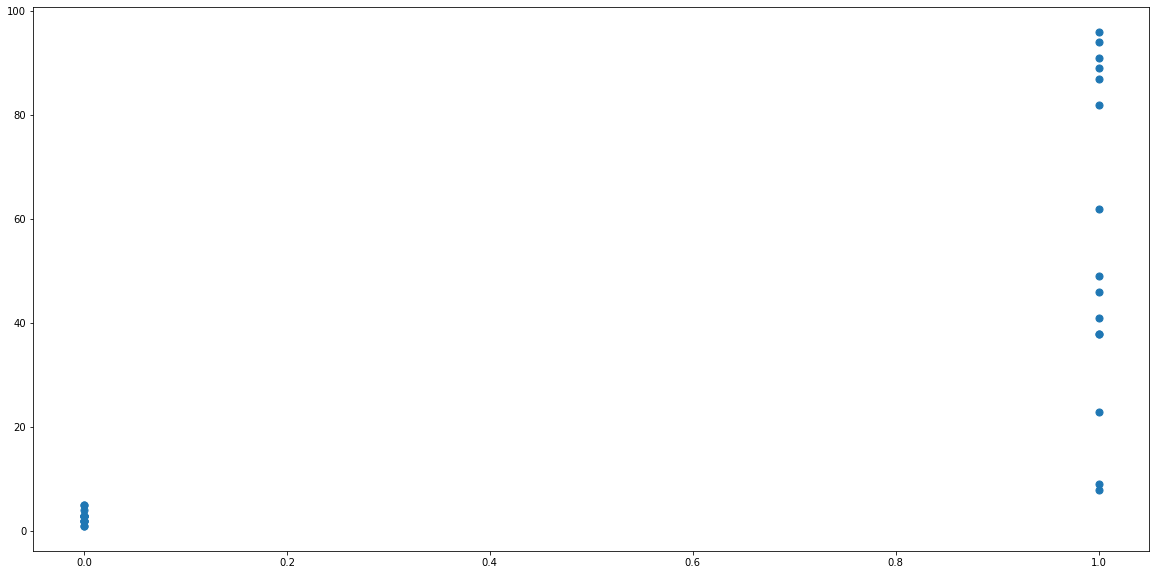

In [462]:
plt.figure(figsize=(20, 10))
plt.scatter(x, y, s=50)

In [479]:
X[y==47].iloc[0, 0::3].value_counts()

3.0     32
1.0     28
0.0     21
2.0     19
47.0     1
Name: 5415, dtype: int64

In [482]:
col = []
for i in range(0, len(X.iloc[5415]) - 1, 3):
    if X.iloc[5415, i] == 2 or X.iloc[5415, i] == 3:
        col.append(X.columns[i])
        col.append(X.columns[i + 1])
        col.append(X.columns[i + 2])
    else:
        col.append(X.columns[i + 2])
col.append('y')

In [483]:
X_new = X.drop(columns=col).iloc[5415]

In [485]:
X_new.shape

(98,)

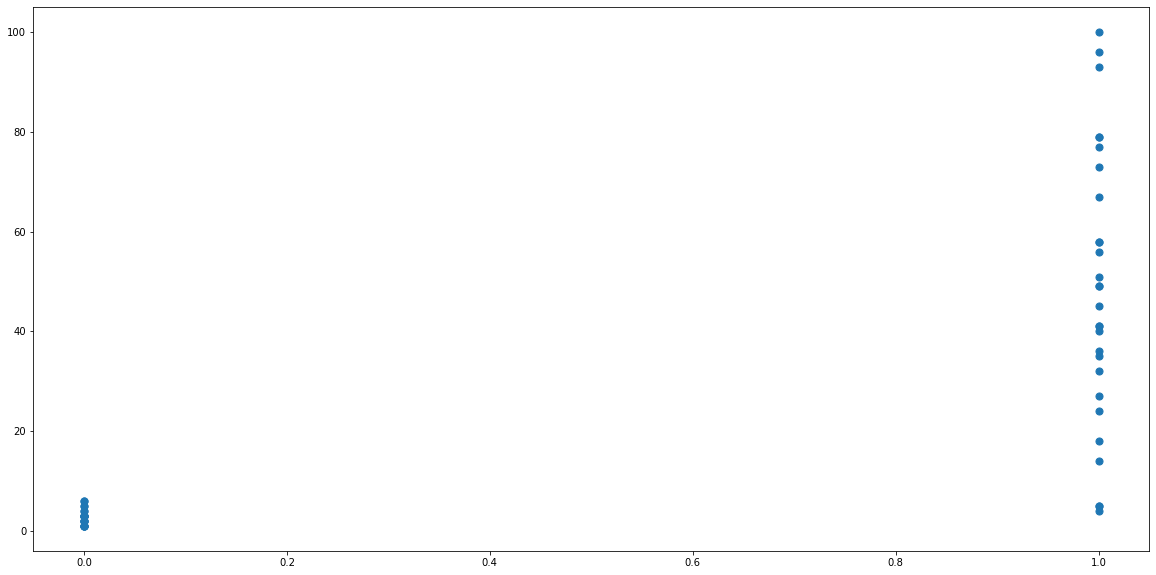

In [486]:
x = []
y = []
for i in range(0, 98, 2):
    x.append(X_new.iloc[i])
    y.append(X_new.iloc[i + 1])
plt.figure(figsize=(20, 10))
plt.scatter(x, y, s=50)